# Week 10 Assignment:

# Solution:

**Importing the required libraries and Data file**

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

In [2]:

                                                                                # Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
df=pd.read_csv('/content/drive/MyDrive/NLP/Week10/imdb-reviews_2.csv')

In [4]:
df

,review,label
0,"first think another Disney movie, might good, ...",1
1,"Put aside Dr. House repeat missed, Desperate H...",0
2,"big fan Stephen King's work, film made even gr...",1
3,watched horrid thing TV. Needless say one movi...,0
4,truly enjoyed film. acting terrific plot. Jeff...,1
...,...,...
4995,Whenever people ask name scariest movie I've e...,1
4996,review applies cut film that's generally avail...,0
4997,"There's little get excited ""Dan Real Life"". Fi...",0
4998,"Twisted, bizarre, enchanting, hilarious! could...",1


# Count the number of positive and negative sentiment

In [5]:

                                                                                # Count the number of positive (1) and negative (0) sentiments
sentiment_counts = df['label'].value_counts()

                                                                                # Print the counts
print("Sentiment Counts:")
print(f"Positive: {sentiment_counts.get(1, 0)}")
print(f"Negative: {sentiment_counts.get(0, 0)}")


Sentiment Counts:
Positive: 2528
Negative: 2472


# Clean the text ‘review’ and create a column called ‘review_processed’

In [6]:
                                                                                # Define a text-cleaning function
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)                                     # Remove special characters
    text = text.lower().strip()                                                 # Convert to lowercase and remove extra spaces
    return text

                                                                                # Clean the text and create a new column
df['review_processed'] = df['review'].apply(clean_text)


# Replace the Short words

In [7]:
                                                                                # Replace short words (length <= 2)
df['review_processed'] = df['review_processed'].apply(
    lambda x: ' '.join([w for w in x.split() if len(w) > 2])
)


# Remove Stop Words

In [8]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
df['review_processed'] = df['review_processed'].apply(
    lambda x: ' '.join([w for w in x.split() if w not in stop_words])
)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Make Custom List of Words to Remove

In [9]:
                                                                                # Custom list of words to remove
custom_words = {'movie', 'film', 'one', 'make', 'even'}
df['review_processed'] = df['review_processed'].apply(
    lambda x: ' '.join([w for w in x.split() if w not in custom_words])
)


# Add more words to the custom list

In [10]:
                                                                                # Add more words to the custom list
custom_words.update(['also', 'would', 'could'])                                 # Example additions


In [11]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [12]:
from nltk.tag import pos_tag


In [13]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [14]:
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
import nltk
nltk.download('punkt')

                                                                                # Helper function to convert NLTK POS tags to WordNet POS tags
def nltk_to_wordnet_pos(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

                                                                                # Lemmatization function
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = nltk.word_tokenize(text)
    pos_tags = pos_tag(tokens)
    lemmatized = [
        lemmatizer.lemmatize(token, nltk_to_wordnet_pos(tag))
        for token, tag in pos_tags
    ]
    return ' '.join(lemmatized)

                                                                                # Apply lemmatization
df['review_processed'] = df['review_processed'].apply(lemmatize_text)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
df['review_processed']

,review_processed
0,first think another disney might good kid watc...
1,put aside house repeat miss desperate housewif...
2,big fan stephen king work make great fan king ...
3,watch horrid thing needless say movie watch se...
4,truly enjoyed act terrific plot jeff combs tal...
...,...
4995,whenever people ask name scariest ive ever see...
4996,review applies cut thats generally available f...
4997,there little get excite dan real life first wh...
4998,twisted bizarre enchant hilarious couldnt stop...


# Plot Most Frequent Words from Positive Reviews

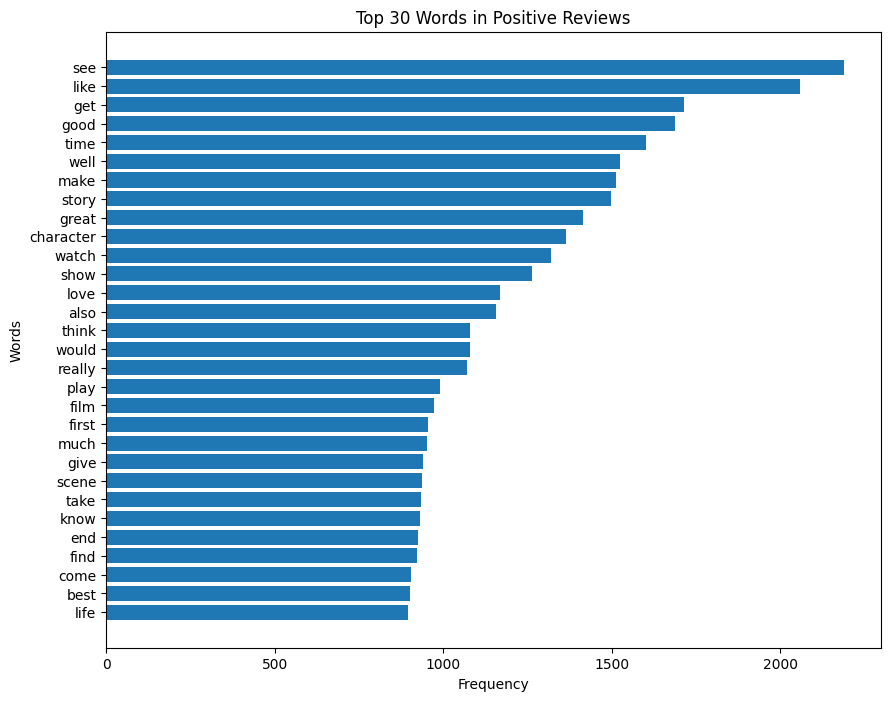

In [16]:
from collections import Counter
import matplotlib.pyplot as plt

                                                                                # Subset positive reviews
positive_reviews = df[df['label'] == 1]
positive_words = ' '.join(positive_reviews['review_processed']).split()

                                                                                # Count word frequency and get top 30
word_freq = Counter(positive_words)
top_words = word_freq.most_common(30)

                                                                                # Plot horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh([word[0] for word in top_words], [word[1] for word in top_words])
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 30 Words in Positive Reviews')
plt.gca().invert_yaxis()
plt.show()


# Create a Word Cloud

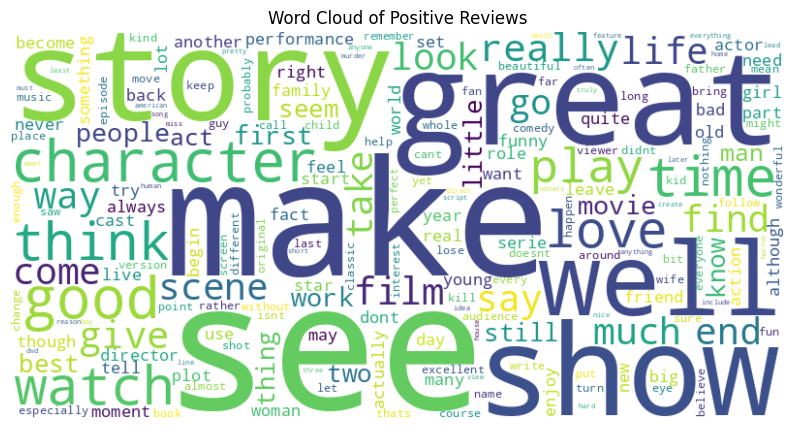

In [17]:
from wordcloud import WordCloud

                                                                                # Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_words))

                                                                                # Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Reviews')
plt.show()


# Create Sparse Matrix Using CountVectorizer

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

                                                                                # Create sparse matrix of 2500 tokens
vectorizer = CountVectorizer(max_features=2500)
X = vectorizer.fit_transform(df['review_processed']).toarray()
y = df['label']

                                                                                # Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train GaussianNB Model and Check Accuracy

In [19]:
from sklearn.naive_bayes import GaussianNB

                                                                                # Train the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

                                                                                # Accuracy
train_accuracy = gnb.score(X_train, y_train)
print(f"GaussianNB Training Accuracy: {train_accuracy}")


GaussianNB Training Accuracy: 0.7955


# Test the Model and Generate Classification Report

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.85      0.74       479
           1       0.81      0.59      0.69       521

    accuracy                           0.72      1000
   macro avg       0.74      0.72      0.71      1000
weighted avg       0.74      0.72      0.71      1000



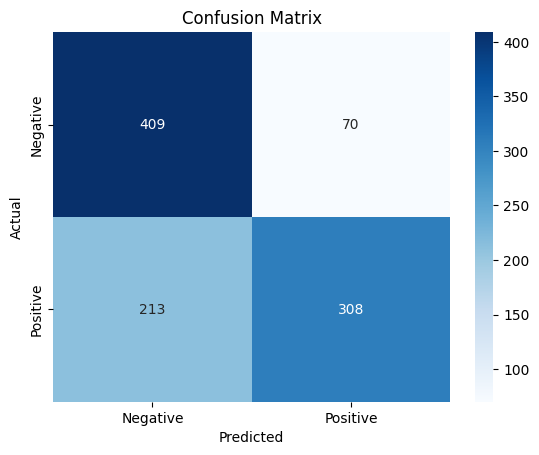

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
                                                                                # Predict
y_pred = gnb.predict(X_test)

                                                                                # Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

                                                                                # Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Logistic Regression for Various C Values

In [21]:
from sklearn.linear_model import LogisticRegression

                                                                                # Logistic Regression with different C values
for C in [0.01, 0.05, 0.5, 1]:
    lr = LogisticRegression(C=C, max_iter=1000)
    lr.fit(X_train, y_train)
    lr_acc = lr.score(X_test, y_test)
    print(f"Logistic Regression Accuracy (C={C}): {lr_acc}")


Logistic Regression Accuracy (C=0.01): 0.844
Logistic Regression Accuracy (C=0.05): 0.849
Logistic Regression Accuracy (C=0.5): 0.829
Logistic Regression Accuracy (C=1): 0.824


# ROC Curve and AUC

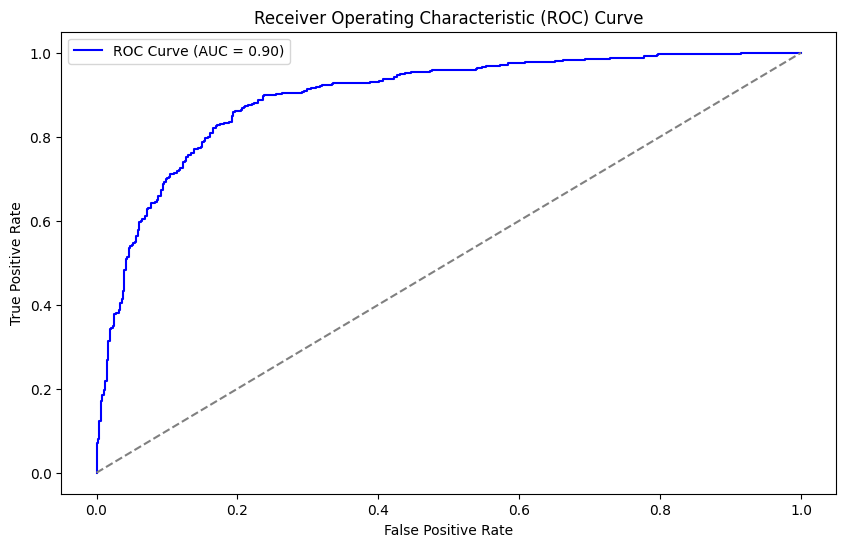

Area Under the Curve (AUC): 0.8959364318658114


In [22]:
from sklearn.metrics import roc_curve, auc

                                                                                # Get probabilities and compute ROC
y_pred_prob = lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

                                                                                # Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f"Area Under the Curve (AUC): {roc_auc}")
